In [20]:
# Patient Demographics Analysis

import sys
import os

# Add the parent directory to sys.path
notebook_dir = os.path.abspath(os.path.dirname('__file__'))
parent_dir = os.path.dirname(notebook_dir)
sys.path.append(parent_dir)

# If the previous approach did not work, you can use this instead
# ================================================================
# Explicitly define the path to the project root
# project_root = os.path.abspath(os.path.join(os.getcwd(), '..'))
# sys.path.append(project_root)
# ================================================================

# Now we can import from src
from src.healthcare_utils import *

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
## 1. Data Loading and Initial Exploration

# Load the dataset
df = load_diabetes_data()

print("Dataset Overview:")
print(df.info())
print("\nFirst few records:")
print(df.head())

Dataset Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Pregnancies       768 non-null    int64  
 1   Glucose           768 non-null    int64  
 2   BloodPressure     768 non-null    int64  
 3   SkinThickness     768 non-null    int64  
 4   Insulin           768 non-null    int64  
 5   BMI               768 non-null    float64
 6   DiabetesPedigree  768 non-null    float64
 7   Age               768 non-null    int64  
 8   Outcome           768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
None

First few records:
   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3 

## 2. Age Distribution Analysis

In [7]:
# Create age groups
df = create_age_groups(df)

# Analyze diabetes by age group
diabetes_by_age = df.loc[df['Outcome'] == 1].groupby('AgeGroup', observed=True)['Outcome'].count()
total_by_age = df.groupby('AgeGroup', observed=True)['Outcome'].count()
age_risk = (diabetes_by_age / total_by_age * 100).round(2)

print("\nDiabetes Risk by Age Group (%):")
print(age_risk)


Diabetes Risk by Age Group (%):
AgeGroup
20-30    21.58
30-40    48.41
40-50    56.64
50-60    57.41
60+      25.93
Name: Outcome, dtype: float64


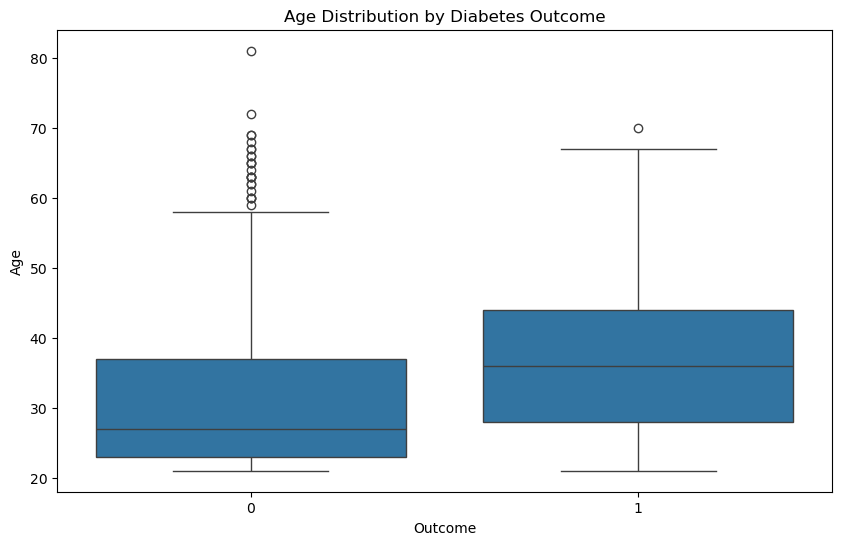

In [8]:
# Visualize age distribution
plot_age_distribution(df)

## 3. BMI Analysis

In [9]:
# Create BMI categories
df = create_bmi_categories(df)

# Analyze BMI distribution
bmi_analysis = df.groupby('BMICategory', observed=True).agg({
    'Outcome': ['count', lambda x: (x == 1).mean() * 100]
}).round(2)

print("\nBMI Category Analysis:")
print(bmi_analysis)


BMI Category Analysis:
            Outcome           
              count <lambda_0>
BMICategory                   
Underweight       4       0.00
Normal          102       6.86
Overweight      179      22.35
Obese           472      46.40


## 4. Risk Factor Analysis

In [10]:
# Calculate risk scores
df['RiskScore'] = calculate_risk_score(df)

# Analyze high-risk patients
high_risk_mask = df['RiskScore'] >= 3
high_risk_patients = df.loc[high_risk_mask]

print("\nHigh Risk Patient Analysis:")
print(f"Number of high-risk patients: {len(high_risk_patients)}")
print(f"Average diabetes rate in high-risk group: {(high_risk_patients['Outcome'] == 1).mean()*100:.2f}%")


High Risk Patient Analysis:
Number of high-risk patients: 151
Average diabetes rate in high-risk group: 72.19%


## 5. Demographic Correlations

In [11]:
# Calculate correlations with outcome
demographic_correlations = df[['Age', 'BMI', 'Pregnancies', 'DiabetesPedigree', 'Outcome']].corr()['Outcome']
print("\nDemographic Correlations with Diabetes:")
print(demographic_correlations.sort_values(ascending=False))


Demographic Correlations with Diabetes:
Outcome             1.000000
BMI                 0.292695
Age                 0.238356
Pregnancies         0.221898
DiabetesPedigree    0.173844
Name: Outcome, dtype: float64


## 6. Visualization of Demographic Patterns

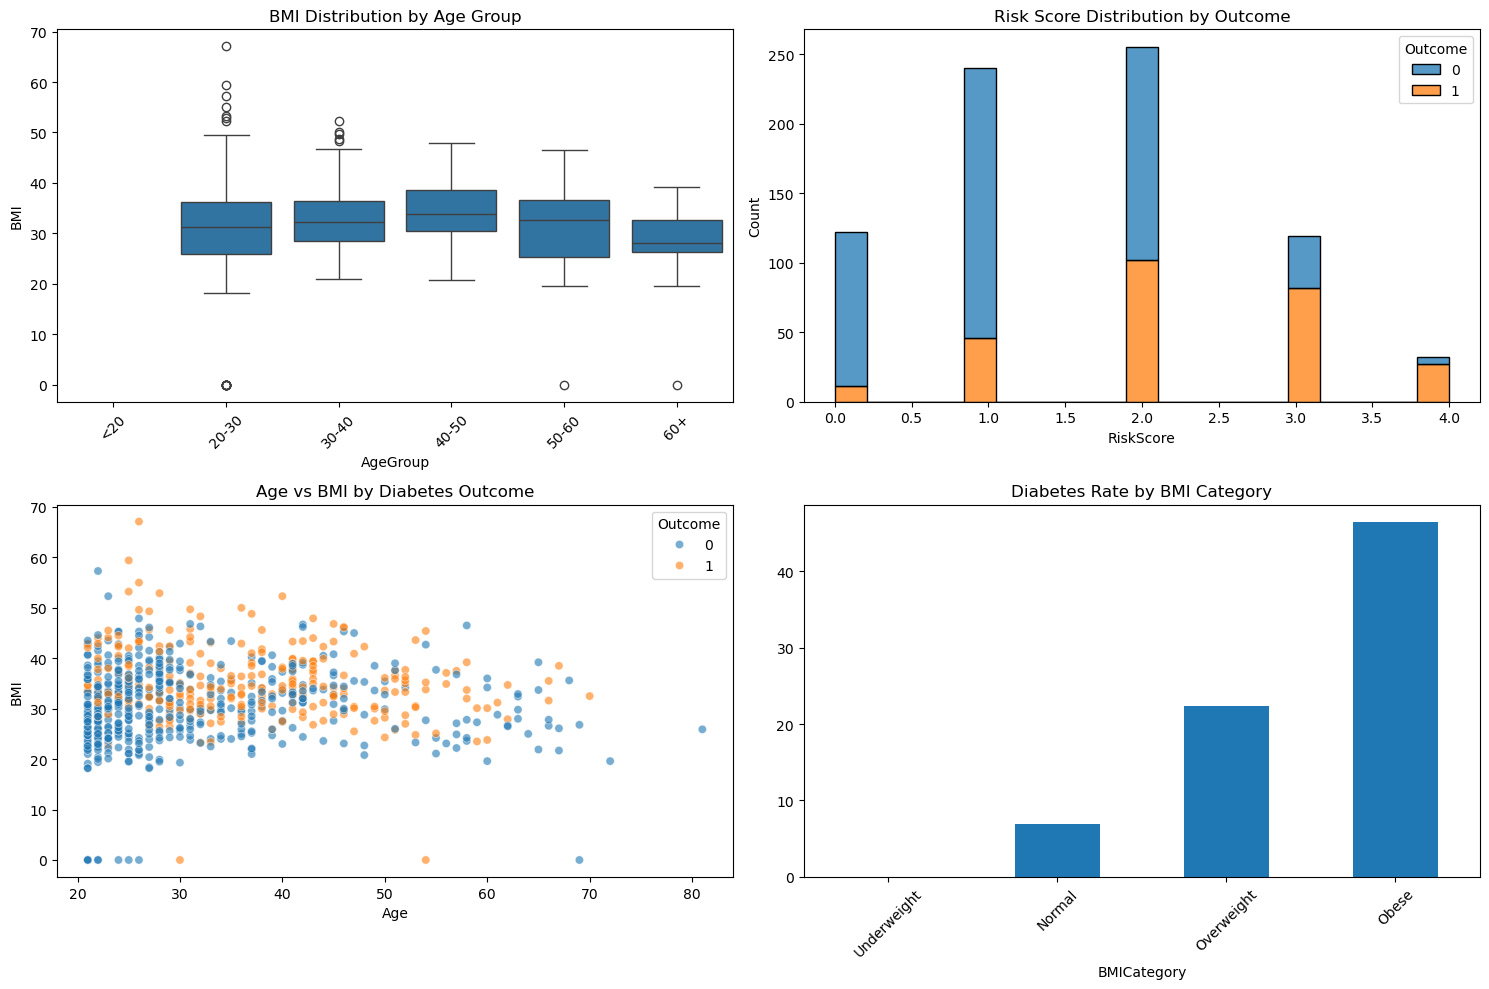

In [14]:
plt.figure(figsize=(15, 10))
# Age distribution by outcome
plt.subplot(2, 2, 1)
sns.boxplot(x='AgeGroup', y='BMI', data=df)
plt.title('BMI Distribution by Age Group')
plt.xticks(rotation=45)

# Risk score distribution
plt.subplot(2, 2, 2)
sns.histplot(data=df, x='RiskScore', hue='Outcome', multiple="stack")
plt.title('Risk Score Distribution by Outcome')

# BMI vs Age with outcome
plt.subplot(2, 2, 3)
sns.scatterplot(data=df, x='Age', y='BMI', hue='Outcome', alpha=0.6)
plt.title('Age vs BMI by Diabetes Outcome')

# Outcome rate by BMI category
plt.subplot(2, 2, 4)
bmi_outcome = df.groupby('BMICategory', observed=True)['Outcome'].mean() * 100
bmi_outcome.plot(kind='bar')
plt.title('Diabetes Rate by BMI Category')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

## 7. Summary Statistics

In [21]:
summary = generate_summary_statistics(df)
print("\nDemographic Summary:")
for key, value in summary.items():
    print(f"{key}: {value}")


Demographic Summary:
total_patients: 768
diabetes_rate: 34.89583333333333
avg_age: 33.240885416666664
avg_bmi: 31.992578124999998
high_risk_count: 151
normal_glucose_count: 0
